In [1]:
import pandas as pd
import numpy as np
import sys
%load_ext rpy2.ipython
%load_ext autotime
import rpy2.robjects.lib.ggplot2 as ggplot2
sys.path.append('../../')
from src.utils import load_splits

time: 5.45 s (started: 2022-05-18 20:55:09 -07:00)


In [45]:
conditional_wfst = pd.read_table('../../output/fst/chi_conditioned_fst.csv', sep='\t', 
header=None, skipfooter=1)

time: 16.9 ms (started: 2022-05-18 21:04:43 -07:00)


/home/stephan/notebooks/child-directed-listening/child-directed-listening-env/lib/python3.8/site-packages/pandas/io/parsers.py:767: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


In [46]:
conditional_wfst
conditional_wfst.columns = ['from','to','input_symbol','output_symbol','surprisal']
conditional_wfst

,from,to,input_symbol,output_symbol,surprisal
0,0,0,0,116,3.111604
1,0,0,0,643,3.476301
2,0,0,0,601,1.164330
3,0,0,0,638,5.648306
4,0,0,0,105,2.869273
...,...,...,...,...,...
757,0,0,952,110,5.470167
758,0,0,952,107,6.386458
759,0,0,952,633,7.772753
760,0,0,952,108,7.079605


time: 16.1 ms (started: 2022-05-18 21:04:44 -07:00)


In [47]:
#!!! the conditional wfst is not in utf-8
conditional_wfst.loc[conditional_wfst.input_symbol == 601]

,from,to,input_symbol,output_symbol,surprisal
590,0,0,601,601,0.284598
591,0,0,601,230,3.416828
592,0,0,601,105,3.361217
593,0,0,601,593,3.954682
594,0,0,601,0,2.942573
595,0,0,601,603,3.087578
596,0,0,601,604,3.626726
597,0,0,601,650,4.016417
598,0,0,601,101,8.449936
599,0,0,601,111,5.258712


time: 20 ms (started: 2022-05-18 21:04:44 -07:00)


In [48]:
def convert_fst_int(x):
    if x == 0:
        return('<epsilon>')
    else:
        return(chr(x))
    

conditional_wfst['input_symbol'] =  [convert_fst_int(x) for x in conditional_wfst['input_symbol']]
conditional_wfst['output_symbol'] =  [convert_fst_int(x) for x in conditional_wfst['output_symbol']]

time: 4.38 ms (started: 2022-05-18 21:04:45 -07:00)


In [49]:
conditional_wfst['probability'] = np.exp(-1 * conditional_wfst['surprisal'])

time: 2.5 ms (started: 2022-05-18 21:04:45 -07:00)


In [50]:
# replace the epsilons with emptysets for legibility
conditional_wfst['input_symbol'] = [x if x != '<epsilon>'  else '⎵' for x in conditional_wfst['input_symbol'] ]
conditional_wfst['output_symbol'] = [x if x != '<epsilon>'  else '⎵' for x in conditional_wfst['output_symbol']]
conditional_wfst

,from,to,input_symbol,output_symbol,surprisal,probability
0,0,0,⎵,t,3.111604,0.044529
1,0,0,⎵,ʃ,3.476301,0.030922
2,0,0,⎵,ə,1.164330,0.312132
3,0,0,⎵,ɾ,5.648306,0.003523
4,0,0,⎵,i,2.869273,0.056740
...,...,...,...,...,...,...
757,0,0,θ,n,5.470167,0.004211
758,0,0,θ,k,6.386458,0.001684
759,0,0,θ,ɹ,7.772753,0.000421
760,0,0,θ,l,7.079605,0.000842


time: 24.7 ms (started: 2022-05-18 21:04:46 -07:00)


In [51]:
np.unique(conditional_wfst['input_symbol']) 

array(['a', 'b', 'd', 'e', 'f', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o',
       'p', 's', 't', 'u', 'v', 'w', 'z', 'æ', 'ð', 'ŋ', 'ɑ', 'ə', 'ɛ',
       'ɡ', 'ɹ', 'ʃ', 'ʊ', 'ʒ', 'θ', '⎵'], dtype=object)

time: 4.25 ms (started: 2022-05-18 21:04:47 -07:00)


In [52]:
conditional_wfst.loc[conditional_wfst.output_symbol == 'ə']

,from,to,input_symbol,output_symbol,surprisal,probability
2,0,0,⎵,ə,1.164330,0.312132
40,0,0,a,ə,4.413164,0.012117
170,0,0,i,ə,1.395284,0.247763
254,0,0,l,ə,4.563429,0.010426
311,0,0,n,ə,6.006948,0.002462
335,0,0,o,ə,2.845672,0.058095
422,0,0,u,ə,2.912700,0.054329
439,0,0,v,ə,5.650869,0.003514
517,0,0,æ,ə,2.505792,0.081611
560,0,0,ŋ,ə,4.353295,0.012864


time: 23.6 ms (started: 2022-05-18 21:04:47 -07:00)


In [53]:
conditional_wfst.loc[conditional_wfst.input_symbol == 'ə']

,from,to,input_symbol,output_symbol,surprisal,probability
590,0,0,ə,ə,0.284598,0.752317
591,0,0,ə,æ,3.416828,0.032816
592,0,0,ə,i,3.361217,0.034693
593,0,0,ə,ɑ,3.954682,0.019165
594,0,0,ə,⎵,2.942573,0.052730
595,0,0,ə,ɛ,3.087578,0.045612
596,0,0,ə,ɜ,3.626726,0.026603
597,0,0,ə,ʊ,4.016417,0.018017
598,0,0,ə,e,8.449936,0.000214
599,0,0,ə,o,5.258712,0.005202


time: 20 ms (started: 2022-05-18 21:04:48 -07:00)


# Filter to commonly-seen phonemes

In [55]:
# Load the phonology from Providence
phono_data = load_splits.load_phono()
phones = pd.DataFrame({'phoneme':  list(' '.join(phono_data.dropna(subset=['actual_phonology_no_dia']).actual_phonology_no_dia))})

time: 11.5 s (started: 2022-05-18 21:05:01 -07:00)


In [63]:
phones['one'] = 1
phones = phones.loc[phones.phoneme != ' ']
phoneme_counts = phones.groupby(['phoneme']).one.agg(np.sum).reset_index()
phoneme_counts.sort_values(by='one', ascending =False)
phonemes_to_keep = phoneme_counts.loc[phoneme_counts.one > 25].phoneme.to_list() + ['⎵'] # need to specify emptyset because this is not otherwise seen


time: 214 ms (started: 2022-05-18 21:05:35 -07:00)


In [64]:
if not 'ə' in phonemes_to_keep:
    raise ValueError('Schwa should be present in the list of phonemes that need to be kept')

time: 474 µs (started: 2022-05-18 21:05:36 -07:00)


In [65]:
short_conditional_wfst = conditional_wfst.loc[(conditional_wfst.input_symbol.isin(phonemes_to_keep))
& (conditional_wfst.output_symbol.isin(phonemes_to_keep))]

time: 3.3 ms (started: 2022-05-18 21:05:37 -07:00)


In [66]:
# try moving it to R
%R -i short_conditional_wfst

time: 73.4 ms (started: 2022-05-18 21:05:39 -07:00)


In [67]:
%%R
alphabet = sort(unique(short_conditional_wfst$input_symbol))
alphabet

 [1] "⎵" "a" "æ" "ɑ" "b" "d" "ð" "e" "ə" "ɛ" "f" "ɡ" "h" "i" "j" "k" "l" "m" "n"
[20] "ŋ" "o" "p" "ɹ" "s" "ʃ" "t" "u" "ʊ" "v" "w" "z" "ʒ" "θ"
time: 48.7 ms (started: 2022-05-18 21:05:39 -07:00)


In [70]:
%%R 
#make a dummy heat map of probability 0 to map below
full_grid = expand.grid(alphabet, alphabet)
names(full_grid) = c('output_symbol', 'input_symbol')
full_grid$probability = 0 

for (i in c(1:nrow(short_conditional_wfst))){
    
    row = short_conditional_wfst[i,]
    full_grid[full_grid$input_symbol == row$input_symbol &
             full_grid$output_symbol == row$output_symbol, 'probability'] = row$probability
    
}    
full_grid = full_grid[order(full_grid$input_symbol, full_grid$output_symbol),]


time: 214 ms (started: 2022-05-26 08:49:27 -07:00)


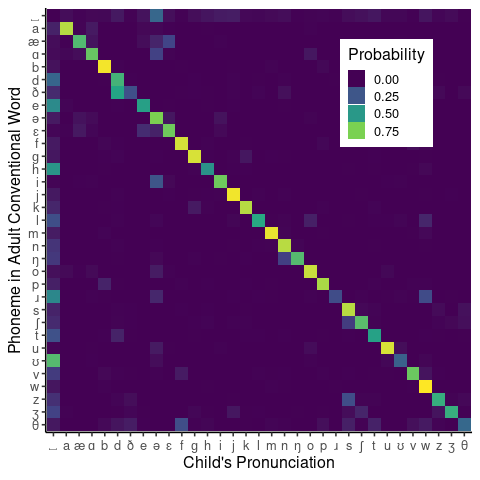

time: 502 ms (started: 2022-05-26 08:52:12 -07:00)


In [74]:
%%R
library('viridisLite')

p1 = ggplot() + geom_tile(
data = full_grid, aes(x=output_symbol, y=as.factor(input_symbol), fill=probability
)) +  scale_fill_viridis_c(na.value=0) + ylab('Phoneme in Adult Conventional Word'
) + xlab("Child's Pronunciation") + theme_classic(base_size=16) +
  guides(fill = guide_legend(title = "Probability")) + theme(legend.position = c(.8, .8)
) + scale_y_discrete(limits=rev)  

ggsave('../../output/figures/fst_prob_matrix.png', width=6, height=6)
print(p1)

In [20]:
# all schwas are deleted; all schwas are added


time: 241 µs (started: 2022-04-06 09:16:47 -07:00)


In [21]:
# Check the original input data to confirm that input and output schwa 

time: 18.8 ms (started: 2022-04-06 09:16:47 -07:00)


In [22]:
training_data = pd.read_table('/home/stephan/notebooks/child-directed-listening/external/2020/task1/data/train/chi_train.tsv', sep='\t', header=None)

time: 66.6 ms (started: 2022-04-06 09:16:47 -07:00)


In [23]:
training_data

,0,1
0,wɑʧ,w ɑ t ʃ
1,ðəs,ə s
2,lʊk,l ʊ ɡ
3,æt,æ
4,ðiz,d i s
...,...,...
179995,eə,ə
179996,slaəd,s l a ə
179997,dəŋ,d i
179998,dəŋ,n i ŋ ɡ


time: 6.62 ms (started: 2022-04-06 09:16:47 -07:00)


In [24]:
print(ord(training_data.iloc[1][0][1]))
print(ord(training_data.iloc[1][1][0])) # confirming that they are the same code point

601
601
time: 6.66 ms (started: 2022-04-06 09:16:47 -07:00)


In [25]:
# there should be more matches on schwa!

time: 8.22 ms (started: 2022-04-06 09:16:47 -07:00)


In [26]:
# [X] is this something bad that happens in the conditioning process? Nope, there are very few entries for schwa in chi-1.txt -- so it is already happening super early in the process
# [X] is there something in the input data
# [X] is there something weird in how I changed train_fst.sh: all I did was change the iterator so that it handles unigram stuff only. Doesn't look I changed anything substantive here 
# [X]  what if we were to switch the seed? Would that have an effect? Does this control which specific instances get tested -- tried switching this out
#     -- switching the seed has no effect
# [X] is there something odd about graphemes vs. phonemes? It looks like the graphemes (utf-8) and phonemes (in their own system) both have a schwa
# [X] confirm that this is up to date
# [ ] Something has to prune this -- so that it isn't 1400 states, but rather only around 400. This must happen in baumwelch training
# [ ] Is there a parameter I can mess with in baumwelchtrain -- nothing obvious

time: 8.9 ms (started: 2022-04-06 09:16:47 -07:00)
